In [1]:
import numpy as np
import operator as op
import math
import random as rd

% display typeset

# Divisão do tempo

In [2]:
data = np.genfromtxt('stringency_index.csv', delimiter=',')[1:]
serie = [(k) for k in data]

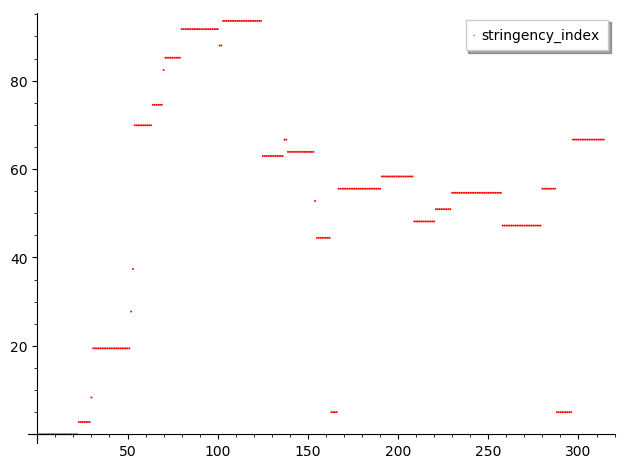

In [3]:
plot = list_plot(serie, color='red', pointsize=2, legend_label='stringency_index', alpha=1)
plot.legend()

show(plot)

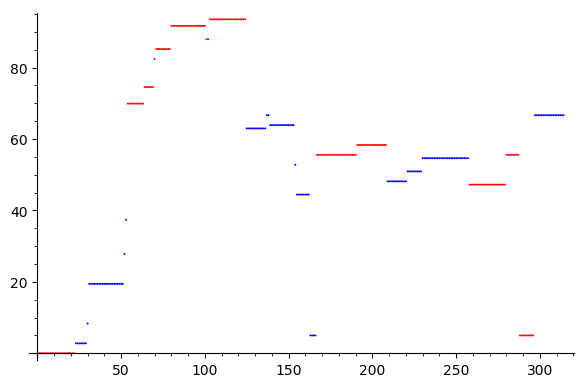

In [4]:
t0 = serie[0  :22 ]
t1 = serie[22 :53 ]
t2 = serie[53 :124]
t3 = serie[124:166]
t4 = serie[166:208]
t5 = serie[208:257]
t6 = serie[257:296]
t7 = serie[296:314]

plot_t0 = list_plot(t0, color='red', pointsize=2, alpha=1)
plot_t1 = list_plot(t1, color='blue', pointsize=2, alpha=1)
plot_t2 = list_plot(t2, color='red', pointsize=2, alpha=1)
plot_t3 = list_plot(t3, color='blue', pointsize=2, alpha=1)
plot_t4 = list_plot(t4, color='red', pointsize=2, alpha=1)
plot_t5 = list_plot(t5, color='blue', pointsize=2, alpha=1)
plot_t6 = list_plot(t6, color='red', pointsize=2, alpha=1)
plot_t7 = list_plot(t7, color='blue', pointsize=2, alpha=1)

show(plot_t0 + plot_t1 + plot_t2 + plot_t3 + plot_t4 + plot_t5 + plot_t6 + plot_t7)

# Escrevendo o Modelo

In [5]:
def achaBt(t, tempos, B0, rho, method = "r"):
    indice = 0
    beta = B0
    
    if t <= tempos[0]:
        if method == "r":
            beta = beta * (1 - rho[indice])
        else:
            beta = beta * math.exp(- rho[indice] * t)
        return beta, indice
    
    while t >= tempos[indice]:
        if indice == len(tempos) - 1 or t < tempos[indice + 1]:
            if t == tempos[indice - 1]:
                return beta, indice
            if method == "r":
                beta = beta * (1 - rho[indice] * (t - tempos[indice - 1]) / t)
            else:
                beta = beta * math.exp(- rho[indice] * (t - tempos[indice]))
                
            return beta, indice
        
        else:
            if indice == 0:
                if method == "r":
                    beta = beta * (1 - rho[indice])
                else:
                    beta = beta * math.exp(- rho[indice] * t)
            else:
                if method == "r":
                    beta = beta * (1 - rho[indice] * (tempos[indice] - tempos[indice - 1]) / tempos[indice])
                else:
                    beta = beta * math.exp(- rho[indice] * (tempos[indice] - tempos[indice - 1]))
            
        indice += 1
    

In [6]:
def model(t, comp, params):
    # alpha e f fixos aqui
    S, E, I, R, D = comp
    B0, Ti, tempos, alpha, rho, f, method = params
    
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        alpha é constantes
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        f é constante também
    '''
    
    N = S + E + I + R + D
    
    if t == 0:
        beta = B0
    else:
        beta, ind = achaBt(t, tempos, B0, rho, method)
        
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD
    ]

In [7]:
def model(t, comp, params):
    S, E, I, R, D = comp
    B0, Ti, tempos, l_alpha, rho, l_f, method = params
    
    '''
        S, E, I, R e D são os compartimentos usuais.
        B0 é o valor inicial de beta
        Ti é a taxa de mortalidade
        tempos é a partição do tempo que estamos fazendo (dia inicial de cada período, sem considerar o dia 0)
        l_alpha é o vetor de alphas para cada intervalo de tempo (são constantes)
        rho é o vetor dos rho_k para cada intervalo de tempo (usados na função de beta)
        l_f é o vetor de f(t) para cada intervalo de tempo (são constantes também)
    '''
    
    N = S + E + I + R + D
    
    if t == 0:
        beta = B0
        ind = 0
    else:
        beta, ind = achaBt(t, tempos, B0, rho, method)
        
    alpha = l_alpha[ind]
    f = l_f[ind]
        
    dS = -beta / N * S * I
    dE = beta / N * S * I - alpha * E
    dI = alpha * E - I / Ti
    dR = (1 - f) / Ti * I
    dD = f / Ti * I
    
    return [
        dS,
        dE,
        dI,
        dR,
        dD
    ]

In [8]:
B0 = 9

Ti = 1/8

tempos = [53 - 31, 124 - 31, 166 - 31, 208 - 31, 257 - 31, 296 - 31, 314 - 31]

alpha = [rd.random(), rd.random(), .2, .4, .5, rd.random(), .7]
rd.shuffle(alpha)
# alpha = [rd.random() for i in range(len(tempos))]
# alpha.sort(reverse = True)

# rho = [0.1 for i in range(len(tempos))]
rho = [.5, rd.random(), rd.random(), .7, .8, .9, rd.random()]
rd.shuffle(rho)

f = [rd.random(), rd.random(), .09, .07, .06, rd.random(), .05]
rd.shuffle(f)
# f = [rd.random() for i in range(len(tempos))]
# f.sort(reverse = True)

alpha = [0.40317568962288286,0.7,0.5,0.6635543291426901,0.4,0.2,0.1993560810137711]

rho = [0.2697415987313351,0.5,0.3735219948032572,0.9,0.8314737743685334,0.7,0.8]

f = [0.06,0.07,0.3053383696511516,0.6522739065822617,0.05,0.09,0.2469534872575344]

In [9]:
# B0 = 10
# Ti = 1/14
# tempos = [314 - 31]
# alpha = 0.3
# rho = [0.1 for i in range(len(tempos))]
# f = 0.3

In [10]:
T = ode_solver()
T.function = model
inits = [1 - 1e-6, 0, 1e-6, 0, 0]
tspan = [0, 280]
T.ode_solve(tspan, inits, num_points = 280, params = [B0, Ti, tempos, alpha, rho, f, "r"])

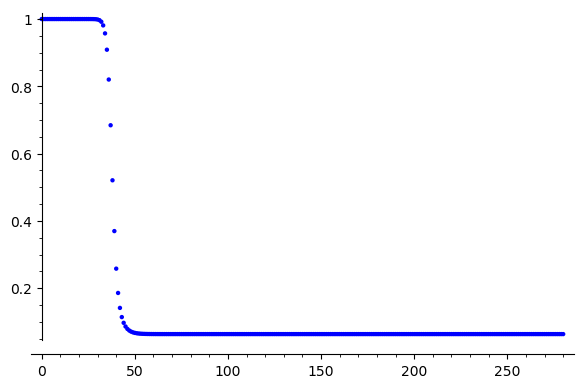

In [11]:
T.plot_solution(0)

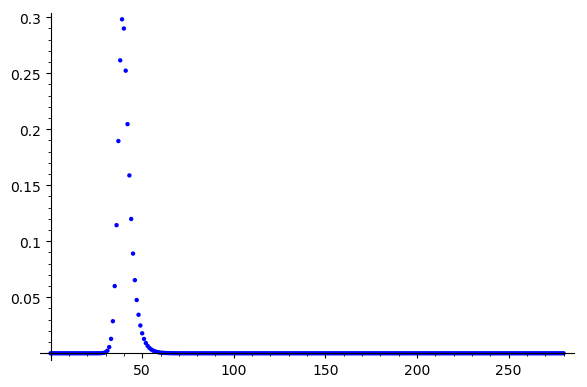

In [12]:
T.plot_solution(1)

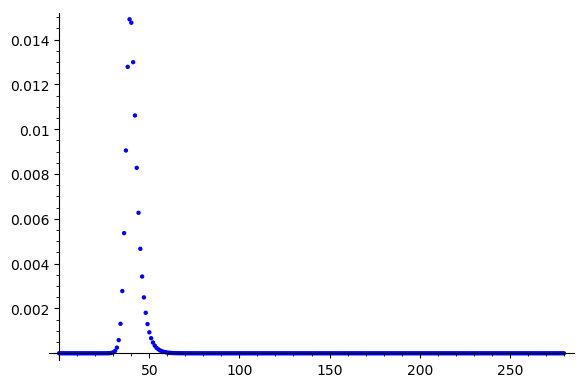

In [13]:
T.plot_solution(2)

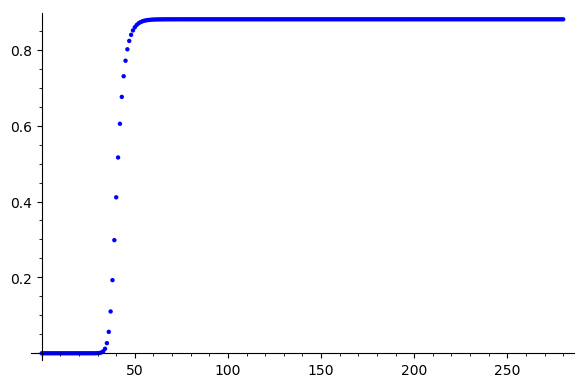

In [14]:
T.plot_solution(3)

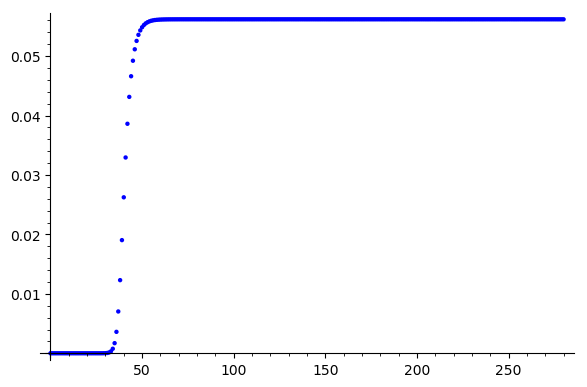

In [15]:
T.plot_solution(4)

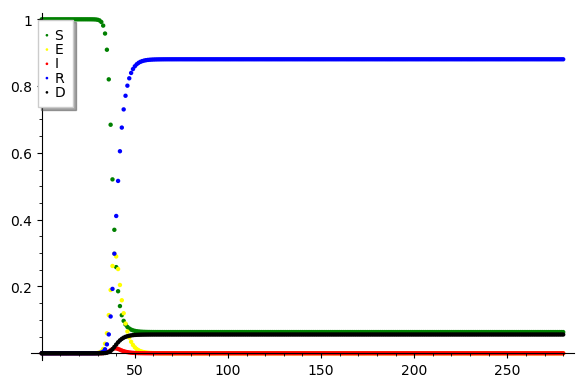

In [16]:
model_out_0 = [(k[0], k[1][0]) for k in T.solution]
model_out_1 = [(k[0], k[1][1]) for k in T.solution]
model_out_2 = [(k[0], k[1][2]) for k in T.solution]
model_out_3 = [(k[0], k[1][3]) for k in T.solution]
model_out_4 = [(k[0], k[1][4]) for k in T.solution]

plot0 = list_plot(model_out_0, color = 'green', pointsize = 10, alpha = 1, legend_label = 'S')
plot1 = list_plot(model_out_1, color = 'yellow', pointsize = 10, alpha = 1, legend_label = 'E')
plot2 = list_plot(model_out_2, color = 'red', pointsize = 10, alpha = 1, legend_label = 'I')
plot3 = list_plot(model_out_3, color = 'blue', pointsize = 10, alpha = 1, legend_label = 'R')
plot4 = list_plot(model_out_4, color = 'black', pointsize = 10, alpha = 1, legend_label = 'D')

plot0.legend()
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()

show(plot0 + plot1 + plot2 + plot3 + plot4)

In [17]:
for i in range(10):
    print(model_out_0[35+i])

(35.0, 0.9088578344290942)
(36.0, 0.8201910046593951)
(37.0, 0.6843007597675214)
(38.0, 0.5206857653894394)
(39.0, 0.369696414826021)
(40.0, 0.25804242905785935)
(41.0, 0.18576632109723)
(42.0, 0.1413297618132314)
(43.0, 0.11406461534721812)
(44.0, 0.09700870110699421)
